In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
project = pd.read_csv(r"C:/Users/poula/Downloads/rawdata.csv")
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
project

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#Calculating number of patients by eahc condition
stroke_count = project['stroke'].sum()
hypertension_count = project['hypertension'].sum()
heart_disease_count = project['heart_disease'].sum()
counts = pd.DataFrame({
    'Condition': ['Stroke', 'Hypertension', 'Heart Disease'],
    'Patients': [stroke_count, hypertension_count, heart_disease_count]
})
counts

,Condition,Patients
0,Stroke,249
1,Hypertension,498
2,Heart Disease,276


C:\Users\poula\AppData\Local\Temp\ipykernel_29300\604300431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Condition', y='Patients', data=counts, palette='coolwarm')


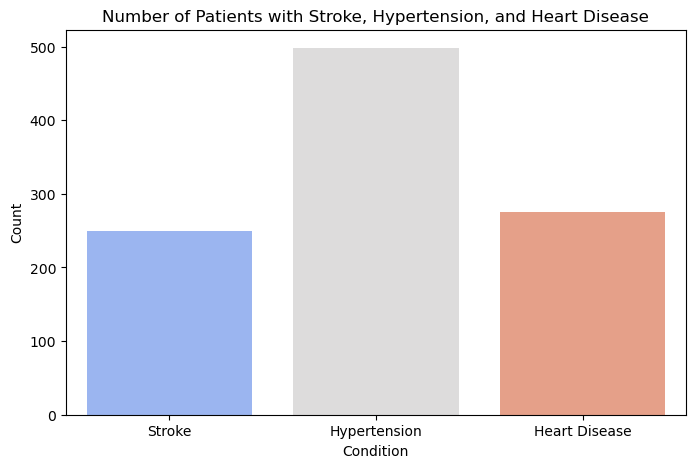

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Condition', y='Patients', data=counts)
plt.title("Number of Patients with Stroke, Hypertension, and Heart Disease")
plt.ylabel("Count")
plt.show()

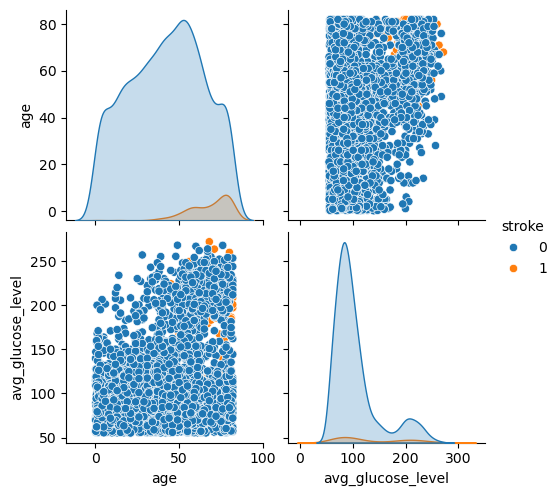

In [13]:

sns.pairplot(project, hue="stroke", vars=['age', 'avg_glucose_level'])
plt.show()

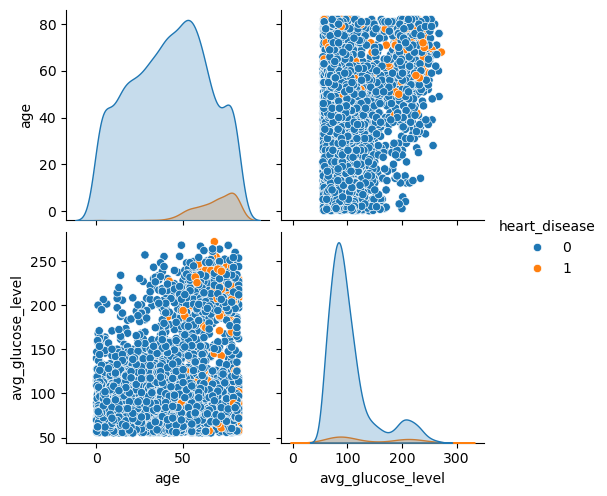

In [14]:
sns.pairplot(project, hue="heart_disease", vars=['age', 'avg_glucose_level'])
plt.show()

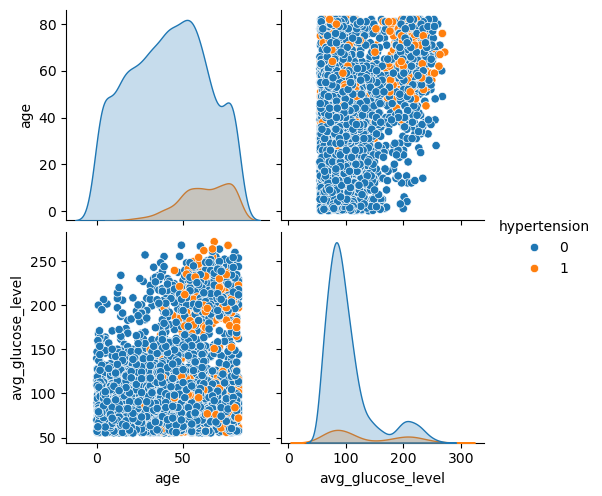

In [15]:
sns.pairplot(project, hue="hypertension", vars=['age', 'avg_glucose_level'])
plt.show()

In [64]:
def categorize_age(age):
    if age < 10:
        return "0-10"
    elif age < 20:
        return "10-20"
    elif age < 30:
        return "20-30"
    elif age < 40:
        return "30-40"
    elif age < 50:
        return "40-50"
    elif age < 60:
        return "50-60"
    elif age < 70:
        return "60-70"
    elif age < 80:
        return "70-80"
    elif age < 90:
        return "80-90"
    else:
        return "90-100"
    
project['age_group'] = project['age'].apply(categorize_age)

In [65]:
def categorize_glucose(glucose):
    if glucose < 100:
        return "Low (55-100)"
    elif glucose < 150:
        return "Medium (101-150)"
    elif glucose < 200:
        return "High (151-200)"
    else:
        return "Very High (201-272)"

project['glucose_group'] = project['avg_glucose_level'].apply(categorize_glucose)

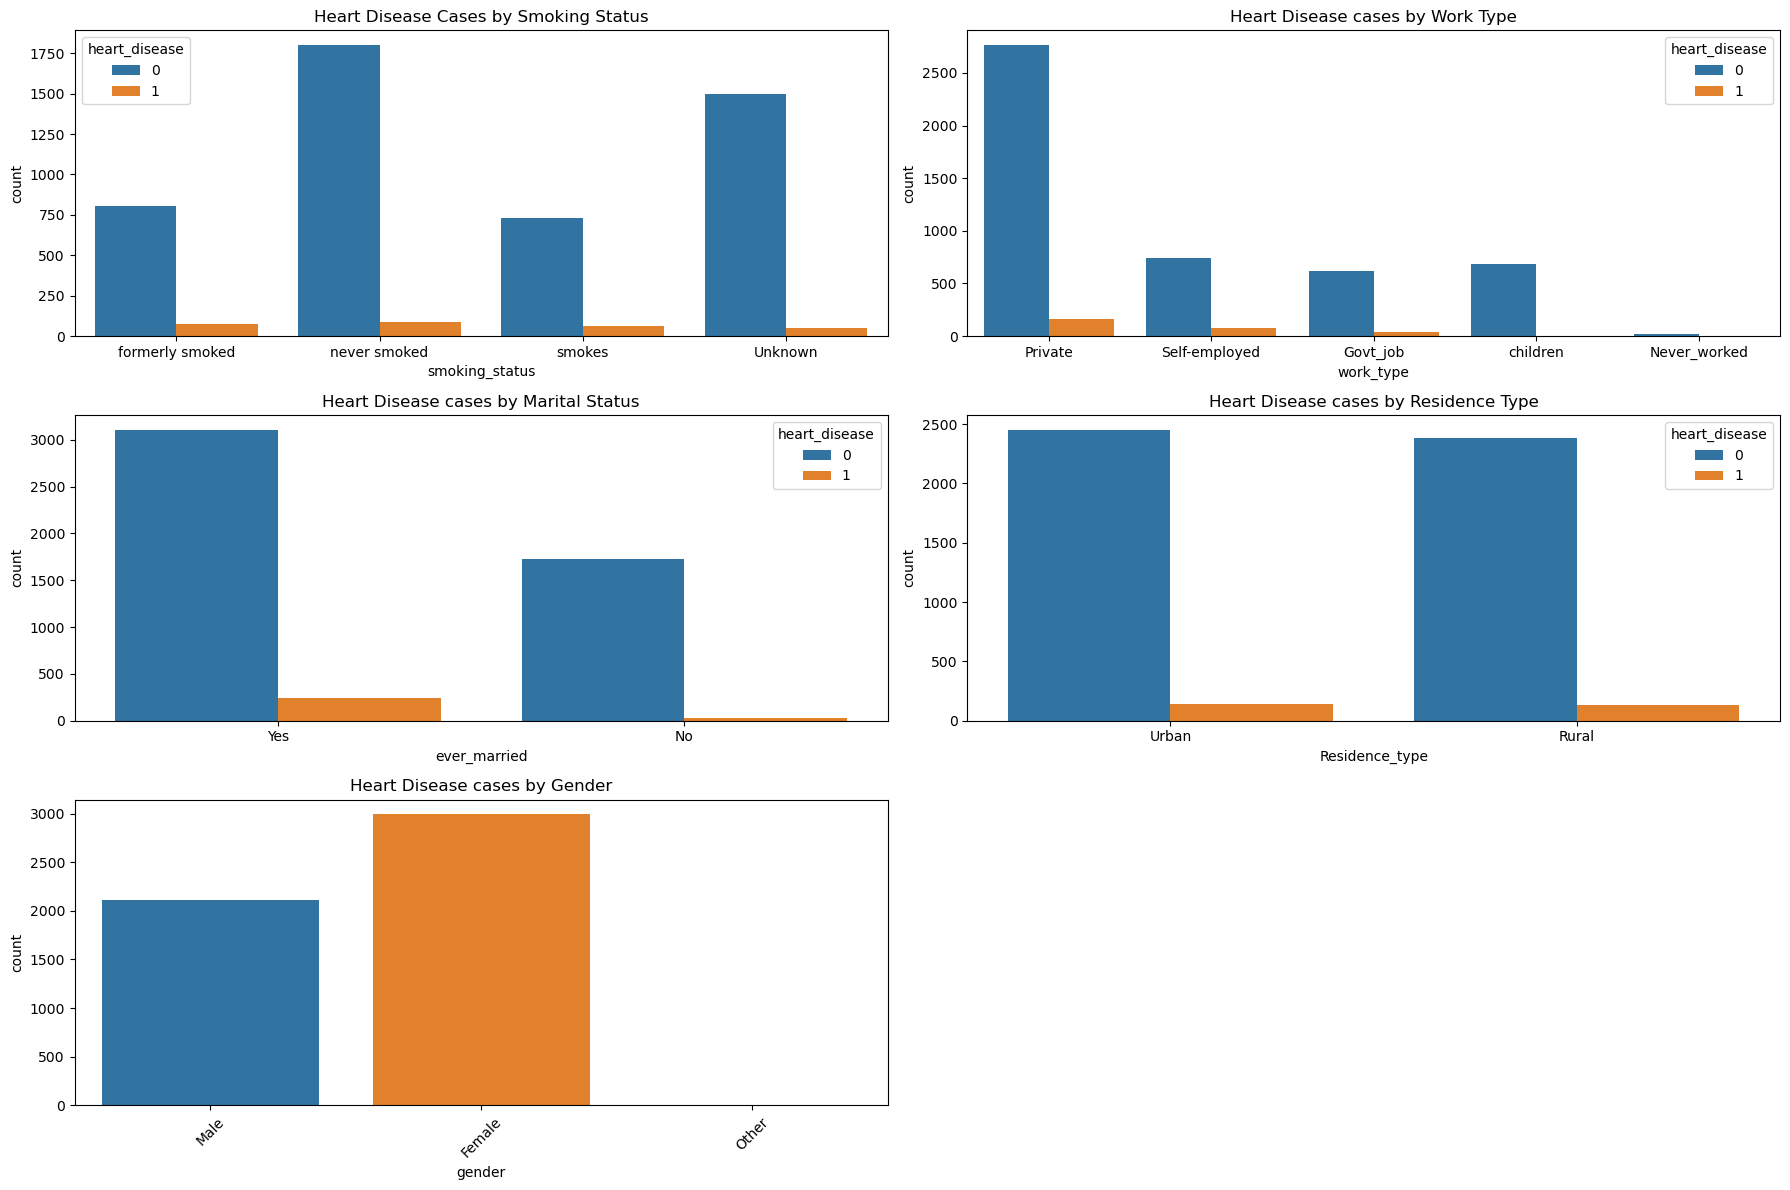

In [67]:
fig, axes = plt.subplots(3,2, figsize=(18, 12)) 
axes = axes.flatten()

sns.countplot(x='smoking_status', hue='heart_disease', data=project, ax=axes[0])
axes[0].set_title("Heart Disease Cases by Smoking Status")
sns.countplot(x='work_type', hue='heart_disease', data=project, ax=axes[1])
axes[1].set_title("Heart Disease cases by Work Type")
sns.countplot(x='ever_married', hue='heart_disease', data=project, ax=axes[2])
axes[2].set_title("Heart Disease cases by Marital Status")
sns.countplot(x='Residence_type', hue='heart_disease', data=project, ax=axes[3])
axes[3].set_title("Heart Disease cases by Residence Type")
sns.countplot(x='gender', hue='gender', data=project, ax=axes[4])
axes[4].set_title("Heart Disease cases by Gender")
fig.delaxes(axes[5])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


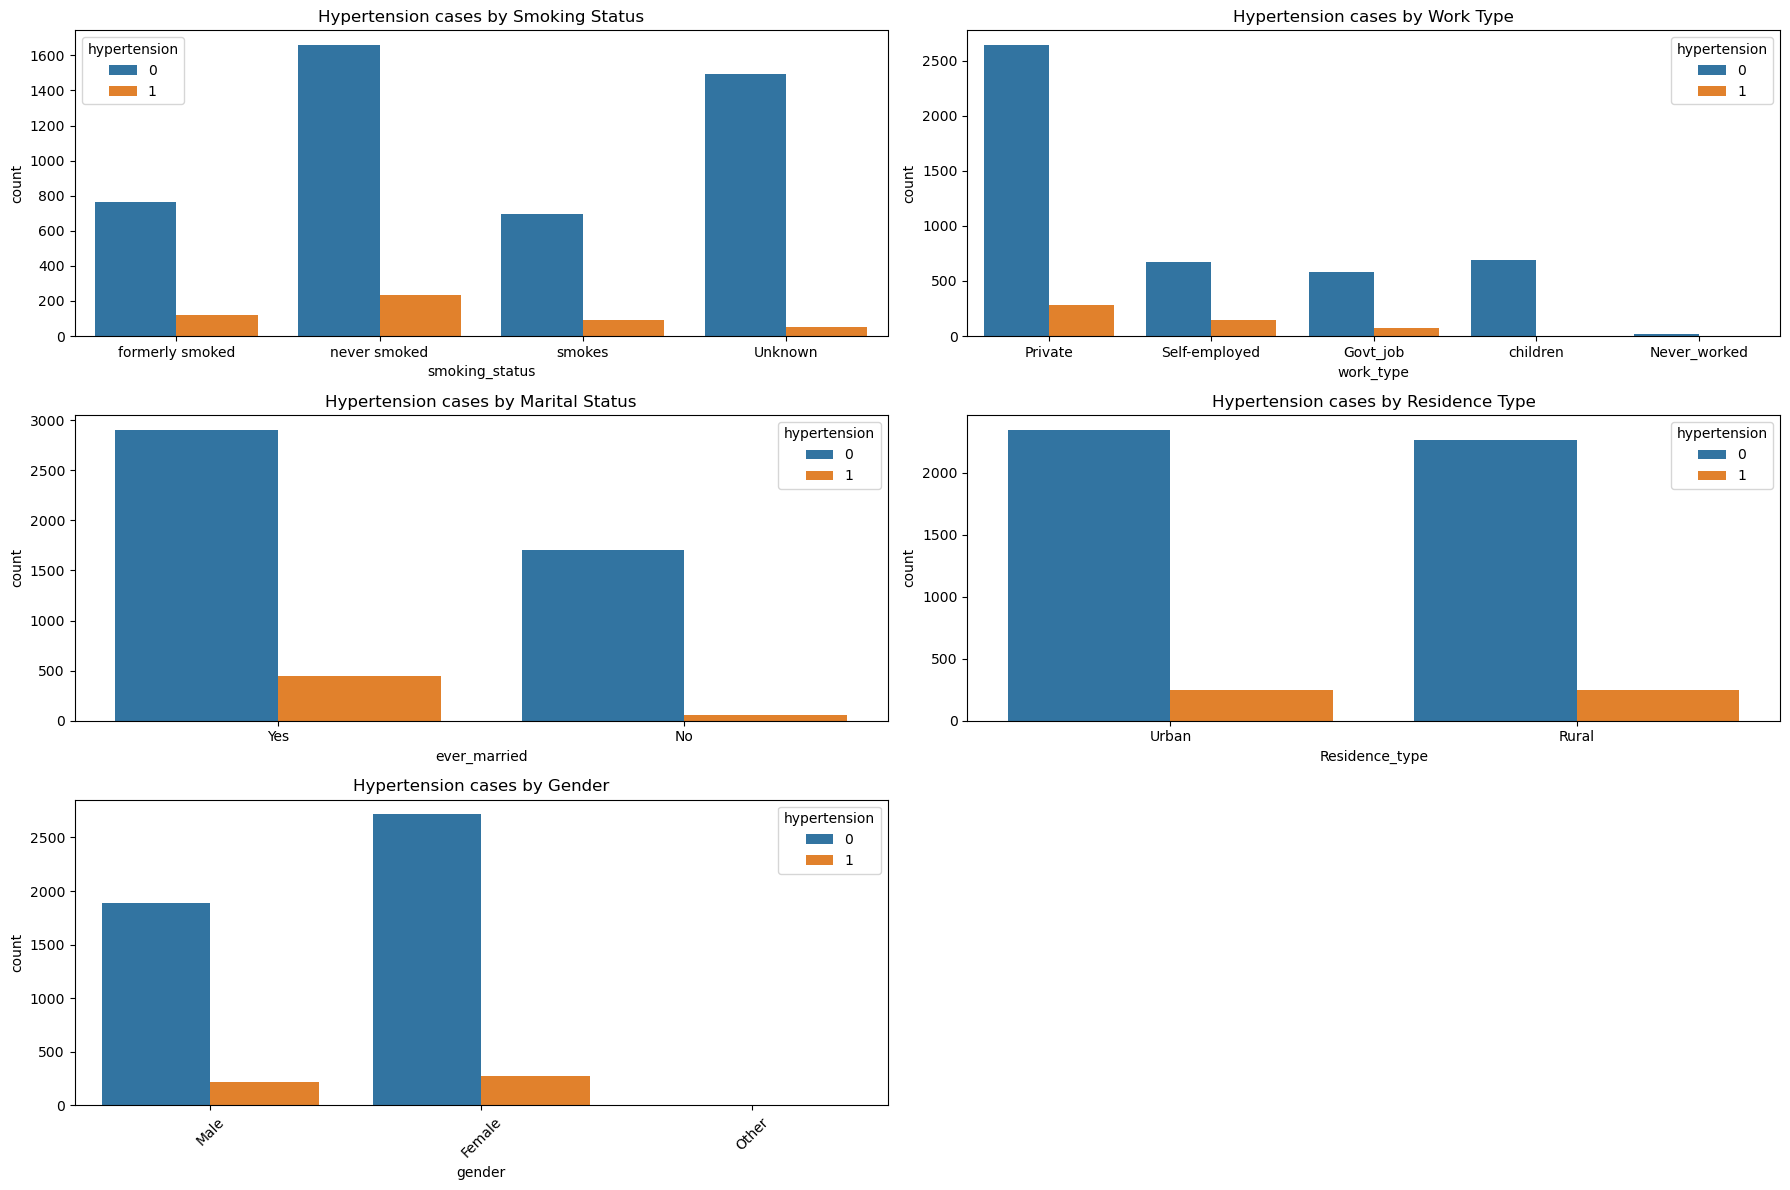

In [50]:
fig, axes = plt.subplots(3,2, figsize=(18, 12)) 
axes = axes.flatten()

sns.countplot(x='smoking_status', hue='hypertension', data=project, ax=axes[0])
axes[0].set_title("Hypertension cases by Smoking Status")
sns.countplot(x='work_type', hue='hypertension', data=project, ax=axes[1])
axes[1].set_title("Hypertension cases by Work Type")
sns.countplot(x='ever_married', hue='hypertension', data=project, ax=axes[2])
axes[2].set_title("Hypertension cases by Marital Status")
sns.countplot(x='Residence_type', hue='hypertension', data=project, ax=axes[3])
axes[3].set_title("Hypertension cases by Residence Type")
sns.countplot(x='gender', hue='hypertension', data=project, ax=axes[4])
axes[4].set_title("Hypertension cases by Gender")
fig.delaxes(axes[5])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

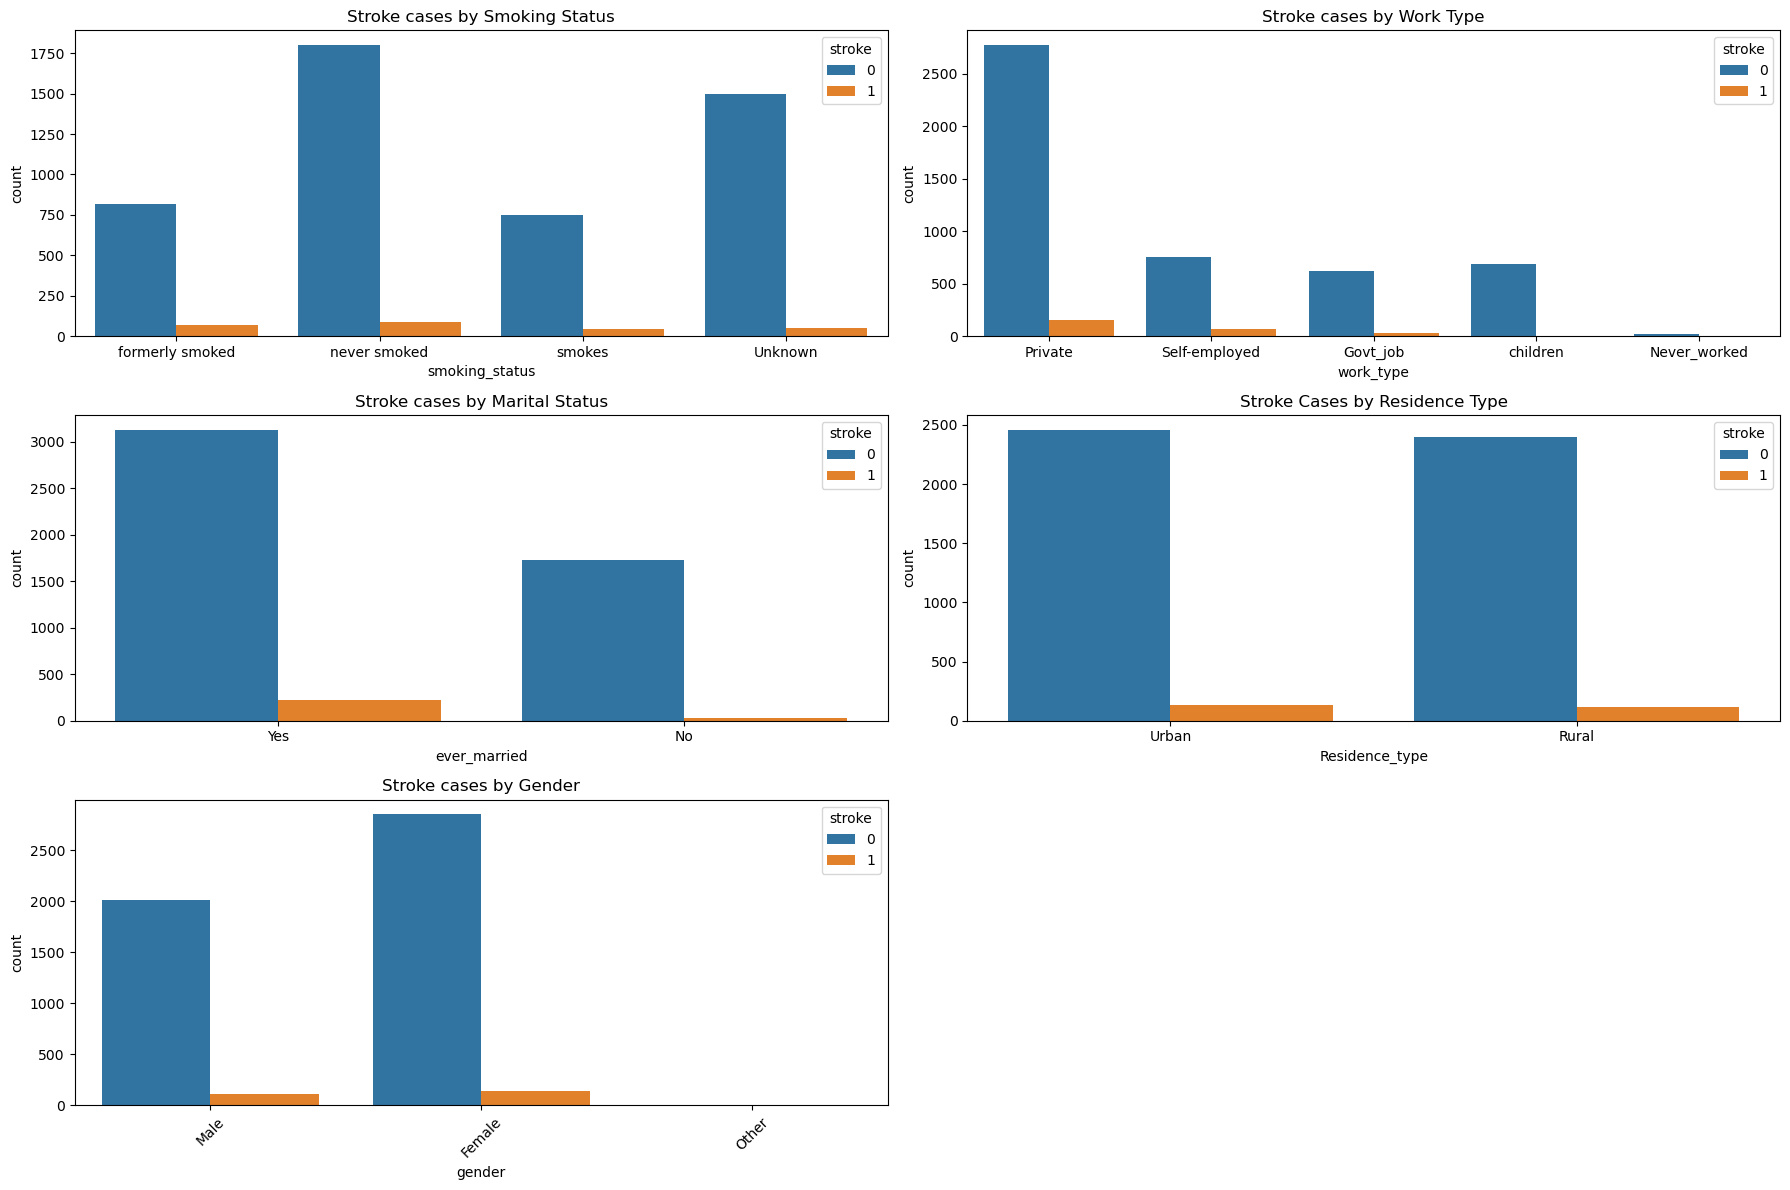

In [52]:
fig, axes = plt.subplots(3,2, figsize=(18, 12)) 
axes = axes.flatten()

sns.countplot(x='smoking_status', hue='stroke', data=project, ax=axes[0])
axes[0].set_title("Stroke cases by Smoking Status")
sns.countplot(x='work_type', hue='stroke', data=project, ax=axes[1])
axes[1].set_title("Stroke cases by Work Type")
sns.countplot(x='ever_married', hue='stroke', data=project, ax=axes[2])
axes[2].set_title("Stroke cases by Marital Status")
sns.countplot(x='Residence_type', hue='stroke', data=project, ax=axes[3])
axes[3].set_title("Stroke Cases by Residence Type")
sns.countplot(x='gender', hue='stroke', data=project, ax=axes[4])
axes[4].set_title("Stroke cases by Gender")
fig.delaxes(axes[5])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

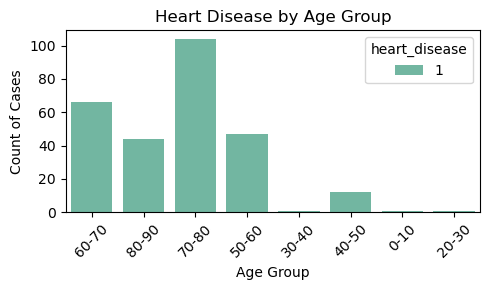

In [83]:
project_filtered = project[project['heart_disease'] == 1]
plt.figure(figsize=(5,3))
sns.countplot(x='age_group', hue='heart_disease', data=project_filtered, palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Count of Cases")
plt.title("Heart Disease by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

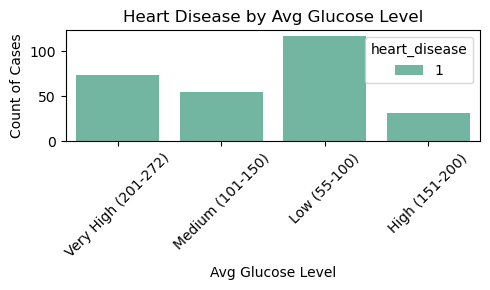

In [98]:
project_filtered = project[project['heart_disease'] == 1]
plt.figure(figsize=(5,3))
sns.countplot(x='glucose_group', hue='heart_disease', data=project_filtered, palette="Set2")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Count of Cases")
plt.title("Heart Disease by Avg Glucose Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

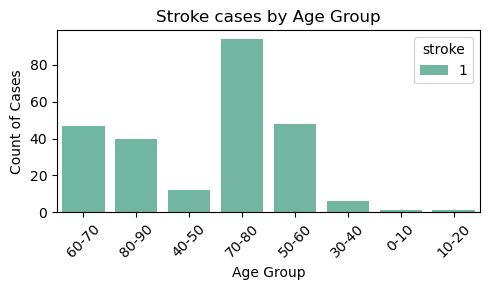

In [85]:
project_filtered = project[project['stroke'] == 1]
plt.figure(figsize=(5,3))
sns.countplot(x='age_group', hue='stroke', data=project_filtered, palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Count of Cases")
plt.title("Stroke cases by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

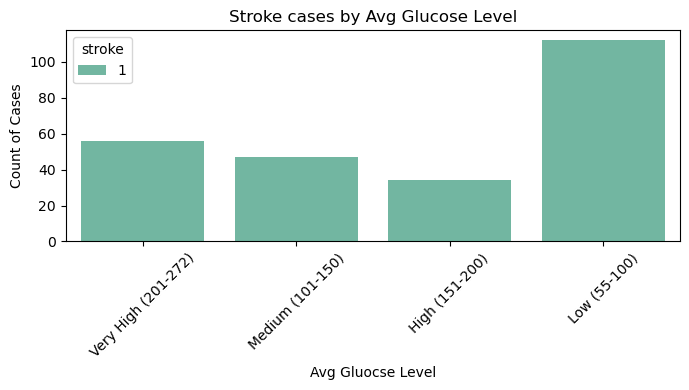

In [97]:
project_filtered = project[project['stroke'] == 1]
plt.figure(figsize=(7,4))
sns.countplot(x='glucose_group', hue='stroke', data=project_filtered, palette="Set2")
plt.xlabel("Avg Gluocse Level")
plt.ylabel("Count of Cases")
plt.title("Stroke cases by Avg Glucose Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

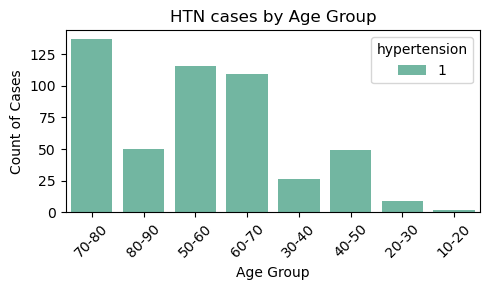

In [101]:
project_filtered = project[project['hypertension'] == 1]
plt.figure(figsize=(5,3))
sns.countplot(x='age_group', hue='hypertension', data=project_filtered, palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Count of Cases")
plt.title("HTN cases by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

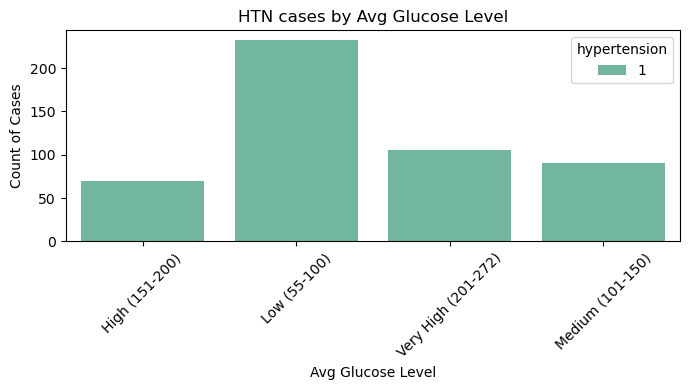

In [100]:
project_filtered = project[project['hypertension'] == 1]
plt.figure(figsize=(7,4))
sns.countplot(x='glucose_group', hue='hypertension', data=project_filtered, palette="Set2")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Count of Cases")
plt.title("HTN cases by Avg Glucose Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()